In [1]:
import pandas as pd
import pickle
import string
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
with open('kp_all_sentiments_translations.pickle', "rb") as f:
    tweets = pickle.load(f)

In [3]:
#Create a dataframe of tweets over time in KP
tweetstime = tweets[["datetime"]]
tweetstime = tweetstime.set_index("datetime")
tweetstime["tweets_count"] = 1
tweetstime = tweetstime.resample("M").sum()

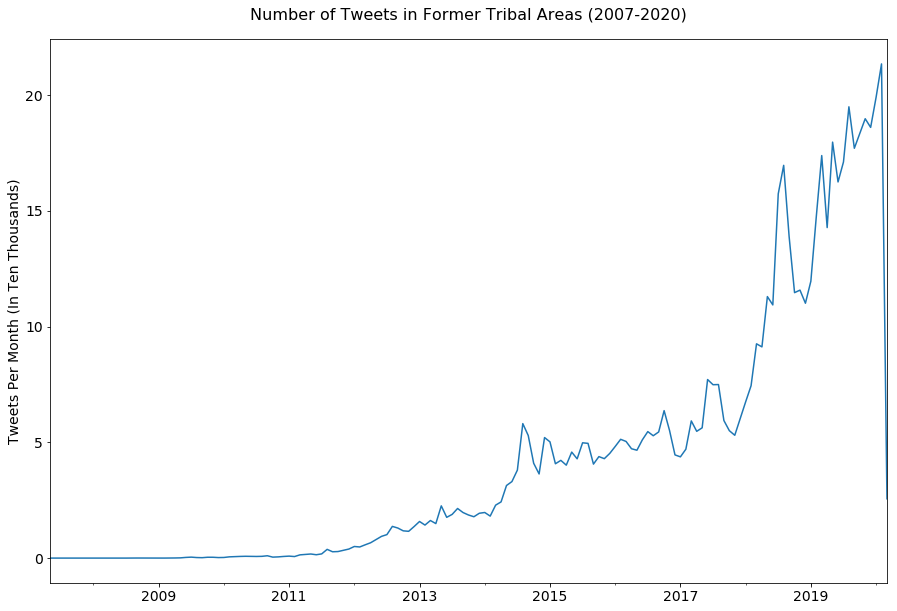

In [42]:
#Plot tweets over time in KP

tweetstime["tweets_count"] = tweetstime["tweets_count"] / 10000
cols_plot = ["tweets_count"]
axes = tweetstime["tweets_count"].plot(marker='', alpha=1, linestyle='-', figsize=(15, 10), subplots=False, legend = False)
axes.set_ylabel('Tweets Per Month (In Ten Thousands)', fontsize = 14)
axes.set_xlabel('',)
axes.set_title('Number of Tweets in Former Tribal Areas (2007-2020)', fontsize = 16, pad=20)
axes.tick_params(axis='both', which='major', labelsize=14)


plt.savefig("Number of Tweets in Former Tribal Areas (2007-2020).pdf", dpi=300, bbox_inches ="tight")


In [4]:
#Create dataframe of unique users over time in KP
users = tweets[["datetime", "user_id"]]
users = users.set_index("datetime")
users = users.resample('M').agg("nunique")
users = users.reset_index()
users = users.set_index("datetime")
users = users["2007-05-31":"2019-12-31"]

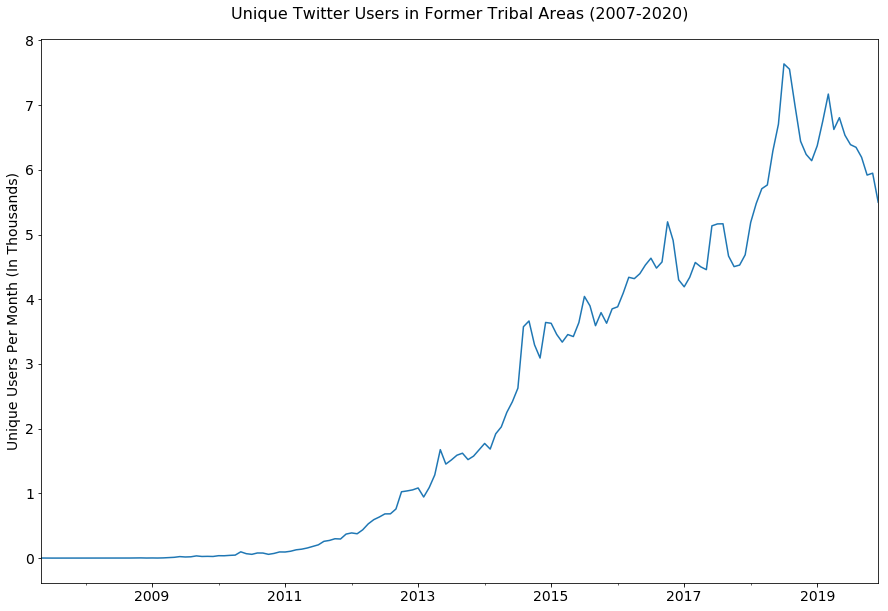

In [51]:
#plot users over time in KP
users = users / 1000

cols_plot = ["user_id"]
axes = users["user_id"].plot(marker='', alpha=1, linestyle='-', figsize=(15, 10), subplots=False, legend = False)
axes.set_ylabel('Unique Users Per Month (In Thousands)', fontsize = 14)
axes.set_xlabel('',)
axes.set_title('Unique Twitter Users in Former Tribal Areas (2007-2020)', fontsize = 16, pad=20)
axes.tick_params(axis='both', which='major', labelsize=14)


plt.savefig("Unique Twitter Users in Former Tribal Areas (2007-2020).pdf", dpi=300, bbox_inches ="tight")

In [5]:
#Create a dataframe of tweets per user in KP
date = tweets["datetime"]
ID = tweets["user_id"]
users_df = pd.DataFrame(list(zip(date, ID)), columns =['Date', 'User_ID']) 
users_df["tweets_per_user_count"] = 1
users_df = users_df.groupby(["User_ID"]).sum()
users_df = users_df.sort_values(by='tweets_per_user_count', ascending=False)
users_df = users_df.reset_index()
users_df = users_df.set_index("User_ID")

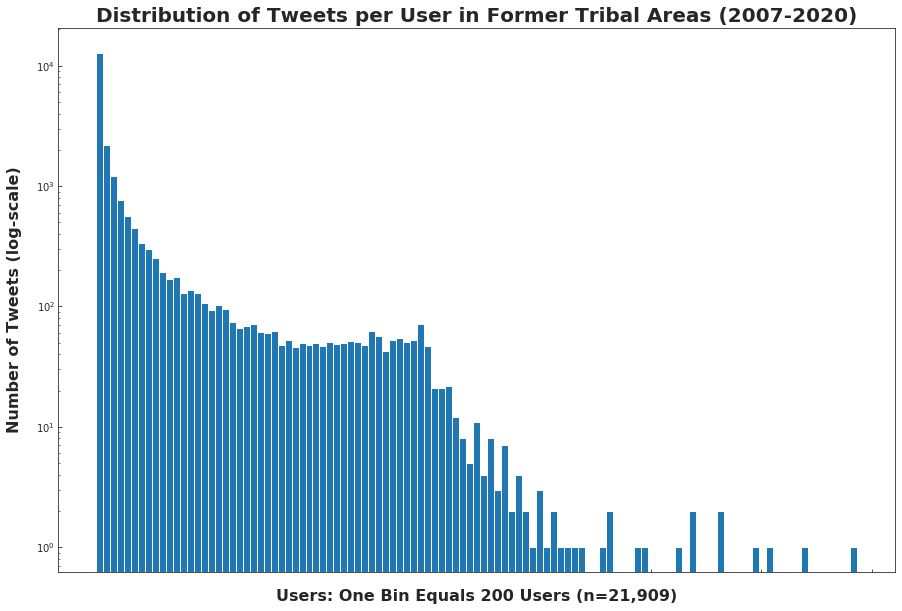

In [9]:
#Plot distribution of tweets per user in KP
with sns.axes_style("white"):
    sns.set_style("ticks")

    fig,ax = plt.subplots(figsize=(15, 10))
    data_to_plot= users_df["tweets_per_user_count"]
    data_to_plot.plot(ax=ax,kind='hist', bins=109)
    ax.set_ylabel('Number of Tweets (log-scale)',fontweight='bold', labelpad = 14, fontsize = 16)
    #ax.set_yscale("log")
    ax.set_xlabel('Users: One Bin Equals 200 Users (n=21,909)', fontweight="bold", labelpad = 14, fontsize =16)
    ax.tick_params(which='both',direction='in',pad=3)
    ax.set_xticklabels("", fontsize = 14)
    ax.set_title("Distribution of Tweets per User in Former Tribal Areas (2007-2020)", fontweight="bold", fontsize=20)
    ax.set_yscale('log')
    
plt.savefig("Distribution of Tweets Per User in Former Tribal Areas (2007-2010).pdf", dpi=300, bbox_inches ="tight")

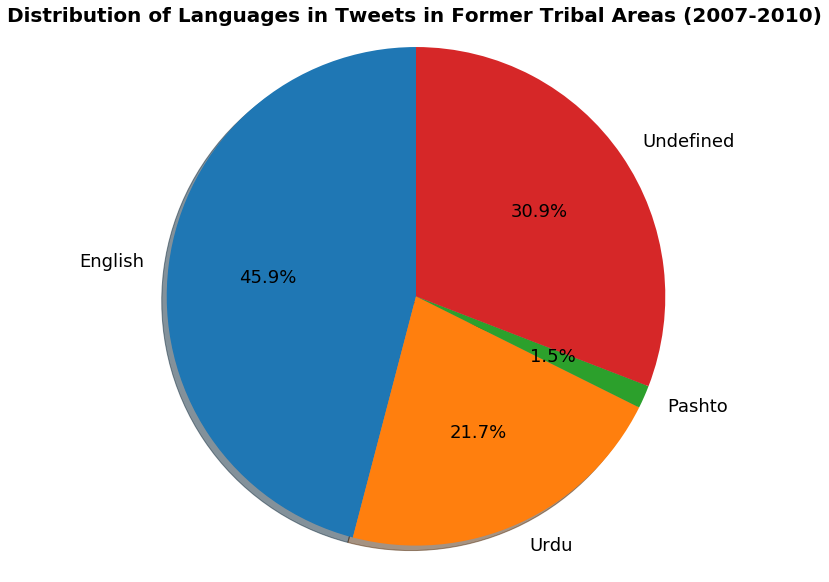

In [81]:
#Plot distribution of languages in KP Tweets

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = "English", "Urdu", "Pashto", "Undefined"
sizes = [4405489, 2084167, 142155, 2961499]

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Distribution of Languages in Tweets in Former Tribal Areas (2007-2010)", fontweight="bold", fontsize=20)
ax1 = plt.rcParams['font.size'] = 18


    
plt.savefig("Distribution of Languages in Tweets in Former Tribal Areas (2007-2010).pdf", dpi=300, bbox_inches ="tight")

plt.show()

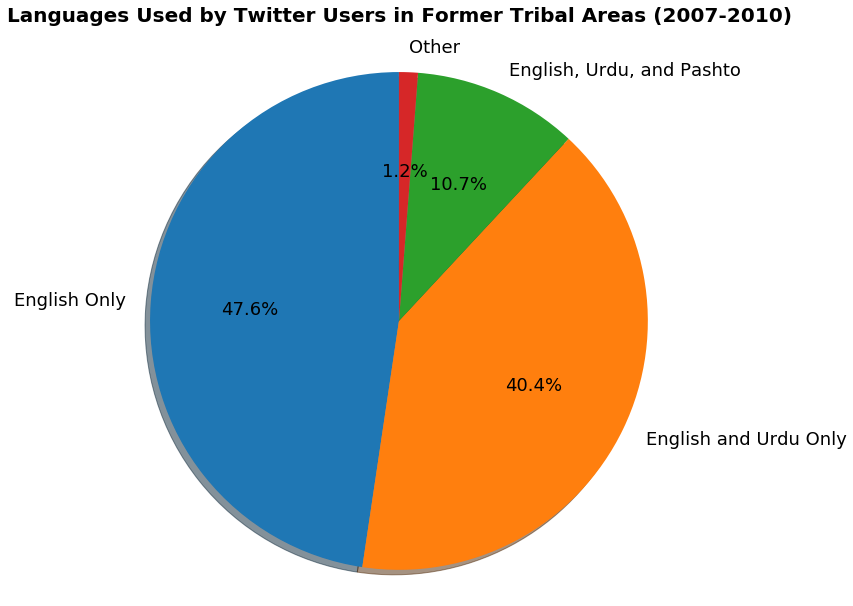

In [86]:
#Plot distribution of languages by KP users

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = "English Only", "English and Urdu Only", "English, Urdu, and Pashto", "Other"
sizes = [11706, 9930, 2631, 301]

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Languages Used by Twitter Users in Former Tribal Areas (2007-2010)", fontweight="bold", fontsize=20, pad=30)
ax1 = plt.rcParams['font.size'] = 18


    
plt.savefig("Languages Used by Twitter Users in Former Tribal Areas (2007-2010).pdf", dpi=300, bbox_inches ="tight")

plt.show()